In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 !pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.1 MB/s eta 

In [ ]:
# import gradio as gr
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
#reading the csv file
data=pd.read_csv('/content/drive/MyDrive/internship -II/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
print(data.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0       3    male  22.0      1      0   7.2500        S         0
1       1  female  38.0      1      0  71.2833        C         1
2       3  female  26.0      0      0   7.9250        S         1
3       1  female  35.0      1      0  53.1000        S         1
4       3    male  35.0      0      0   8.0500        S         0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cols=['Sex','Embarked']
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


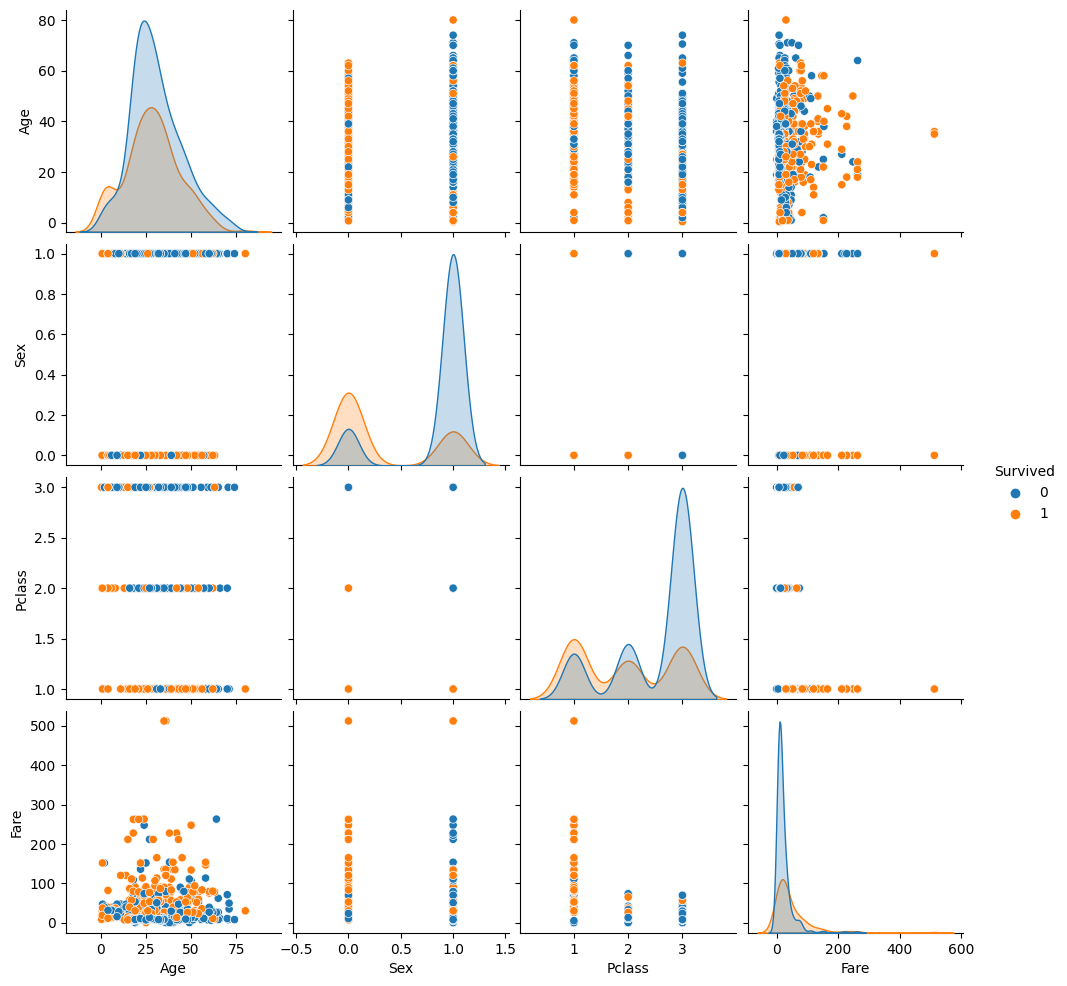

In [ ]:
sns.pairplot(data=data[['Age','Sex','Pclass','Fare','Survived']],hue='Survived')

In [ ]:
data.loc[pd.isnull(data["Age"]), 'Age'] = round(data['Age'].mean())
data.loc[pd.isnull(data["Embarked"]), 'Embarked'] = 1
data.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


In [ ]:
#splitting x and y
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

# SVM Algoriithm

In [ ]:
from sklearn.svm import SVC
classifier1 = SVC(kernel='rbf')
classifier1.fit(X_train,Y_train)

SVC()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier1,X=X_train,y=Y_train,cv=10)
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}".format(accuracies.std()*100))

Accuracy : 67.97%
Standard Deviation : 3.76


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25,0.50,0.75,1.0],'kernel':['rbf','linear']}]
grid_search = GridSearchCV(estimator=classifier1,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search.fit(X_train,Y_train)
best_accuracy1 = grid_search.best_score_
best_parameters1 = grid_search.best_params_
print("Best Accuracy : {:.2f}%".format(best_accuracy1*100))
print("Best Parameters : ",best_parameters1)

Best Accuracy : 78.95%
Best Parameters :  {'C': 0.25, 'kernel': 'linear'}


In [ ]:
Y_pred1 = classifier1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred1))

0.6536312849162011


# Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()
classifier2.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier2,X=X_train,y=Y_train,cv=10)
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}".format(accuracies.std()*100))

Accuracy : 79.50%
Standard Deviation : 3.15


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25,0.50,0.75,1.0]}]
grid_search = GridSearchCV(estimator=classifier2,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search.fit(X_train,Y_train)
best_accuracy2 = grid_search.best_score_
best_parameters2 = grid_search.best_params_
print("Best Accuracy : {:.2f}%".format(best_accuracy2*100))
print("Best Parameters : ",best_parameters2)

Best Accuracy : 80.35%
Best Parameters :  {'C': 0.25}


In [ ]:
Y_pred2 = classifier2.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred2)

0.7988826815642458

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier3 = DecisionTreeClassifier()
classifier3.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier3,X=X_train,y=Y_train,cv=10)
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}".format(accuracies.std()*100))

Accuracy : 78.37%
Standard Deviation : 3.44


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion':['gini','entropy','log_loss']}]
grid_search = GridSearchCV(estimator=classifier3,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search.fit(X_train,Y_train)
best_accuracy3 = grid_search.best_score_
best_parameters3 = grid_search.best_params_
print("Best Accuracy : {:.2f}%".format(best_accuracy3*100))
print("Best Parameters : ",best_parameters3)

Best Accuracy : 78.93%
Best Parameters :  {'criterion': 'entropy'}


In [ ]:
Y_pred3 = classifier3.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred3)

0.7541899441340782

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(n_estimators = 100)
classifier4.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier4,X=X_train,y=Y_train,cv=10)
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}".format(accuracies.std()*100))

Accuracy : 82.17%
Standard Deviation : 4.22


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion':['gini','entropy','log_loss'],'n_estimators' : [100]}]
grid_search = GridSearchCV(estimator=classifier4,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search.fit(X_train,Y_train)
best_accuracy4 = grid_search.best_score_
best_parameters4 = grid_search.best_params_
print("Best Accuracy : {:.2f}%".format(best_accuracy4*100))
print("Best Parameters : ",best_parameters4)

Best Accuracy : 82.18%
Best Parameters :  {'criterion': 'log_loss', 'n_estimators': 100}


In [ ]:
Y_pred4 = classifier4.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred4)

0.7821229050279329

# XG BOOST

In [ ]:
import xgboost as xgb

In [ ]:
classifier5 = xgb.XGBClassifier()
classifier5.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
Y_pred5=classifier5.predict(X_test)

In [ ]:
accuracy_score(Y_pred5,Y_test)

0.7877094972067039

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier5,X=X_train,y=Y_train,cv=10)
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}".format(accuracies.std()*100))

Accuracy : 81.19%
Standard Deviation : 3.54


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'booster':['gbtree','gblinear','dart'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV(estimator=classifier5,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search.fit(X_train,Y_train)
best_accuracy5 = grid_search.best_score_
best_parameters5 = grid_search.best_params_
print("Best Accuracy : {:.2f}%".format(best_accuracy5*100))
print("Best Parameters : ",best_parameters5)

Best Accuracy : 83.29%
Best Parameters :  {'booster': 'gbtree', 'gamma': 0.9}


# Tuning the Best Parameters for SVC

In [ ]:
from sklearn.svm import SVC
classifier1 = SVC(C = 0.75 , kernel='linear')
classifier1.fit(X_train,Y_train)

SVC(C=0.75, kernel='linear')

In [ ]:
Y_pred1 = classifier1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred1))

0.776536312849162


# Tuning the Best Parameters for Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(C=1.0)
classifier2.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred2 = classifier2.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred2)

0.7988826815642458

# Tuning the Best Parameters for Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier3 = DecisionTreeClassifier(criterion='entropy')
classifier3.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
Y_pred3 = classifier3.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred3)

0.7653631284916201

# Tuning the Best Parameters for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(criterion='entropy',n_estimators = 100)
classifier4.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
Y_pred4 = classifier4.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred4)

0.776536312849162

In [ ]:
import xgboost as xgb
classifier5 = xgb.XGBClassifier(booster = 'gbtree', gamma = 0.8)
classifier5.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
Y_pred5 = classifier5.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred5)

0.7932960893854749

In [ ]:
def classify(num):
    if num==0:
        return "(⌣̩̩́_⌣̩̩̀) Not Survived"
    if num==1:
        return "ヘ( ^o^)ノ Survived"

In [ ]:
def predict_titanic(Pclass,Sex,Age,SibSp,Parch,Fare_Embarked):
  in_array=np.array([[Pclass,Sex,Age,SibSp,Parch,Fare_Embarked]])
  predict=classifier4.predict(in_array)
  output=classify(predict[0])
  if output=="(⌣̩̩́_⌣̩̩̀) Not Survived" :
    return [(0,output)]
  else:
    return [(1,output)]


In [ ]:
# iface = gr.Interface(
#     fn=predict_titanic,
#     inputs=[
#         gr.inputs.Number(label="Pclass"),
#         gr.inputs.Radio(["Male", "Female"], label="Sex"),
#         gr.inputs.Number(label="Age"),
#         gr.inputs.Number(label="SibSp"),
#         gr.inputs.Number(label="Parch"),
#         gr.inputs.Number(label="Fare_Embarked"),
#     ],
#     outputs=gr.outputs.Textbox(label="Prediction"),
#     live=True,
#     title="Titanic Survival Prediction",
#     description="Predict Titanic survival based on input features.",
# )

# # Launch Gradio interface
# iface.launch()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
def titanic_prediction(Pclass,Sex,Age,SibSp,Parch,Fare,Embarked):
    x = np.array([ Pclass,Sex,Age,SibSp,Parch,Fare,Embarked])
    prediction =  classifier4.predict(x.reshape(1,-1))
    if prediction == [0] :
        prediction = 'Not Survived'
    else:
        prediction ="Survived"
    return prediction
outputs = gr.outputs.Textbox()
classification = gr.Interface(fn=titanic_prediction, inputs=["number","number","number","number","number","number"], outputs=outputs, description=' survival prediction')

In [ ]:
classification.launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://0cf00318e78afeb3c5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7863 <> https://81198b01dbce6ee143.gradio.live
Killing tunnel 127.0.0.1:7864 <> https://b312839a6e1805fdf1.gradio.live
Killing tunnel 127.0.0.1:7865 <> https://0cf00318e78afeb3c5.gradio.live


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
data['Pclass'].unique()

array([3, 1, 2])

In [ ]:
Pclass= gr.inputs.Slider(minimum=1,maximum=3,default=0,label="Pclass")
Age=gr.inputs.Slider(minimum=0,maximum=100,default=30,label="Age")
SibSp=gr.inputs.Slider(minimum=0,maximum=8,default=3,label="SibSp")
Parch=gr.inputs.Slider(minimum=0,maximum=6,default=1,label="Parch")
Fare=gr.inputs.Slider(minimum=0,maximum=100,default=1,label="Fare")
Embarked=gr.inputs.Slider(minimum=0,maximum=100,default=1,label="Embarked")

In [ ]:
outcome=gr.outputs.HighlightedText(color_map={"Survived !!" : "lightgreen",
                                         "Not Survived" : "red"})

In [ ]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
data['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5